In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Diabetes = pd.read_csv('C:\\Users\\HP\\Desktop\\SmartInternz\\diabetes.csv')
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos


In [3]:
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [4]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Diabetes                    768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Diabetes['Result'] = labelencoder_y.fit_transform(Diabetes['Diabetes'])

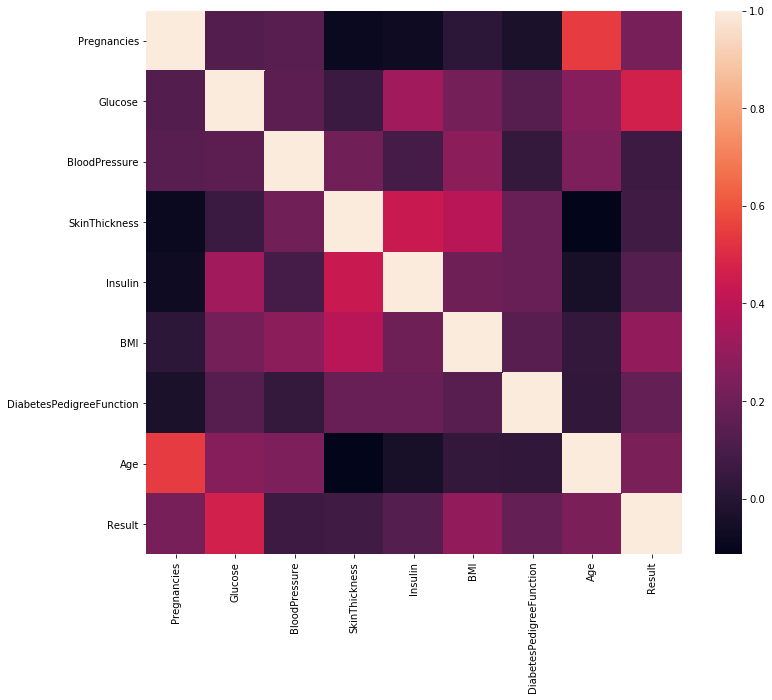

In [7]:
plt.figure(figsize = (12, 10))
sns.heatmap(Diabetes.corr())

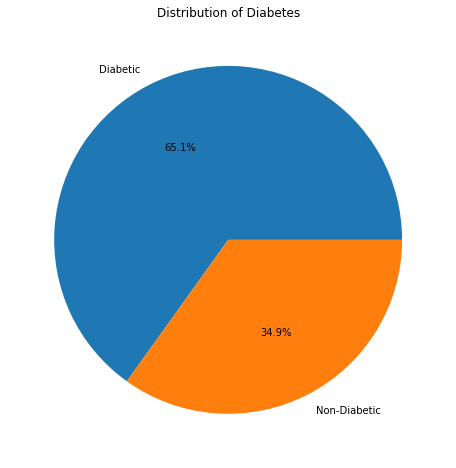

In [8]:
plt.figure(figsize=(8,8))
data_pie = Diabetes['Result'].value_counts()
data_pie_labels = 'Diabetic','Non-Diabetic'
plt.pie(data_pie, labels=data_pie_labels, autopct='%.1f%%')
plt.title("Distribution of Diabetes")
plt.show()

Text(0, 0.5, 'Result')

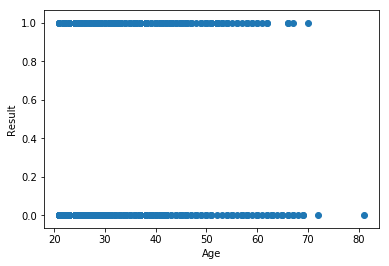

In [9]:
plt.scatter(Diabetes['Age'],Diabetes['Result'])
plt.xlabel('Age')
plt.ylabel('Result')

Text(0, 0.5, 'Result')

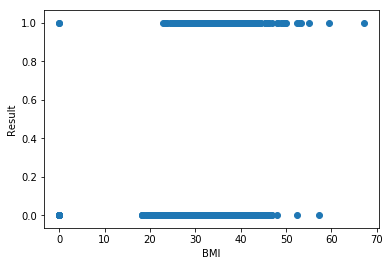

In [10]:
plt.scatter(Diabetes['BMI'],Diabetes['Result'])
plt.xlabel('BMI')
plt.ylabel('Result')

In [11]:
X = Diabetes.drop(['Diabetes','Result'], axis=1)
y = Diabetes['Result']
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [12]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [13]:
y.isnull().sum()

0

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30,random_state=0) 

In [34]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_predict = log_model.predict(X_test)
log_model_score= log_model.score(X_test, y_test)
print(log_model_score)

0.7835497835497836


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_predict)
ac

0.7835497835497836

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[142,  15],
       [ 35,  39]], dtype=int64)

In [37]:
import sklearn.metrics as metrics
fpr, tpr, threashhold =  metrics.roc_curve(y_test,y_predict)

In [38]:
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.7157428128765708

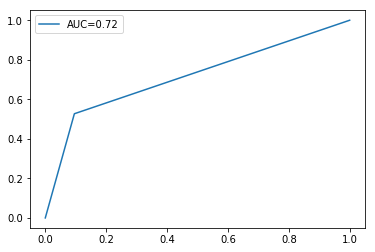

In [39]:
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend()
plt.show()

In [40]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})

In [41]:
df1 = df.head(25)
print(df1)

     Actual  Predicted
661       1          1
122       0          0
113       0          0
14        1          1
529       0          0
103       0          0
338       1          1
588       1          1
395       0          0
204       0          0
31        1          1
546       1          1
278       0          0
593       0          0
737       0          0
202       0          0
175       1          1
55        0          0
479       0          0
365       0          0
417       1          1
577       1          0
172       0          0
352       0          0
27        0          0


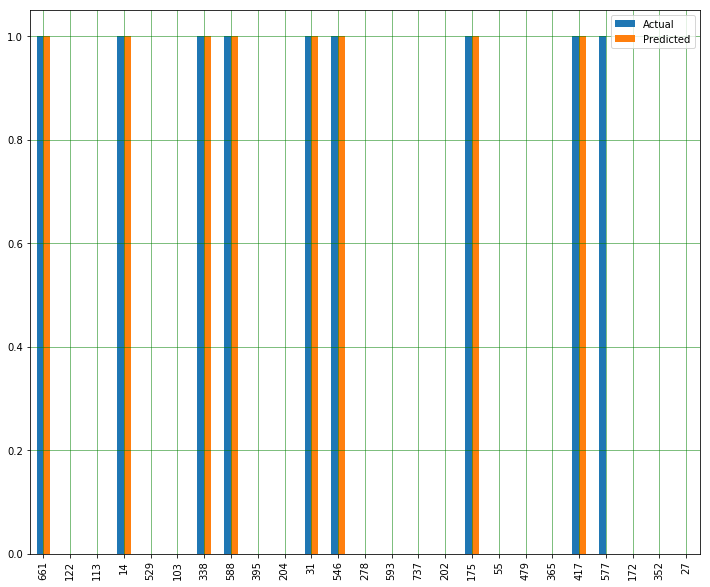

In [42]:
df1.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [45]:
y_predict1 = log_model.predict([[6,148,72,35,0,33.6,0.627,50]])
y_predict1

array([1])